In [1]:
#Title & Desc Here

In [1]:
import glob
import os
import math
import torch
import random
import pandas as pd
import numpy as np


def sortKeyFunc(s):
    return int(os.path.basename(s)[12:-4])

def list_df_rows_to_vectors(list_df):
    all_vectors = []
    for dfs in list_df:
        vectors = df_rows_to_vectors(dfs)
        all_vectors.extend(vectors)
    return all_vectors

def df_rows_to_vectors(df):
    vectors = []
    for rows in range(len(df)):
        row = df.iloc[rows]
        vectors.append(row.values)
    return vectors

def split_list_on_ratio(liste, ratio, shuffle=False, random_seed=42):
    len_list = len(liste)
    if shuffle:
        random.seed(random_seed)
        random.shuffle(liste)
    
    index_where_to_split = math.floor(len_list * ratio)

    list_part_a = liste[:index_where_to_split]
    list_part_b = liste[index_where_to_split:]
    
    return list_part_a, list_part_b

def bomb_csv_to_df(csv_stringLoader):
    list_df = []
    list_data_units = []
    list_data_label_type = []
    allFiles = sorted(glob.glob(csv_stringLoader), key=sortKeyFunc)

    for files in allFiles:
        print('Loading:{}'.format(files))
        df = pd.read_csv(files)
        df = df.drop('Description', axis=1)
        df = df.set_index('TIME OF DAY IN SECONDS')

        data_units = df.iloc[0]
        data_units.name = 'Unit'

        data_label_type = df.iloc[1]
        data_label_type.name = 'Type'

        df = df.iloc[3:].reset_index()
        
        list_df.append(df)
        list_data_units.append(data_units)
        list_data_label_type.append(data_label_type)
        
    return list_df, list_data_units, list_data_label_type

#TODO: Func to verify if list_data_units and list_data_label_type are all the same

#purely exogeneous (non-regressive)
def list_df_to_exogeneous_df(list_df, target_choice):
    list_df_features = []
    list_df_targets = []

    for df in list_df:
        if target_choice==0:
            features_list = ['TIME OF DAY IN SECONDS', '1st Cooling Sys MASS FLOW', '2nd Cooling Sys MASS FLOW', 'ACS_Zone_Actual_Temperature', 'Outside Air Temperature_OAT', 'Pressure Altitude', 'Mach', '1st Underfloor flow', '2nd Underfloor flow']
            targets_list = ['1st AVIONICS BAY BULK TEMP', '2nd AVIONICS BAY BULK TEMP']
        elif target_choice==1:
            features_list = ['TIME OF DAY IN SECONDS', '1st Cooling Sys MASS FLOW', 'ACS_Zone_Actual_Temperature', 'Outside Air Temperature_OAT', 'Pressure Altitude', 'Mach', '1st Underfloor flow']
            targets_list = ['1st AVIONICS BAY BULK TEMP']
        elif target_choice==2:
            features_list = ['TIME OF DAY IN SECONDS', '2nd Cooling Sys MASS FLOW', 'ACS_Zone_Actual_Temperature', 'Outside Air Temperature_OAT', 'Pressure Altitude', 'Mach', '2nd Underfloor flow']
            targets_list = ['2nd AVIONICS BAY BULK TEMP']
        else:
            target_choice=1
            features_list = ['TIME OF DAY IN SECONDS', '1st Cooling Sys MASS FLOW', 'ACS_Zone_Actual_Temperature', 'Outside Air Temperature_OAT', 'Pressure Altitude', 'Mach', '1st Underfloor flow']
            targets_list = ['1st AVIONICS BAY BULK TEMP']
        
        df_features = df[features_list]
        df_targets = df[targets_list]
        
        list_df_features.append(df_features)
        list_df_targets.append(df_targets)
        
    return list_df_features, list_df_targets

#purely endogenous (non-autoregressive)
#to verify if the model can learn copying data
def list_df_to_endogeneous_df(list_df, target_choice):
    list_df_features = []
    list_df_targets = []

    for df in list_df:
        if target_choice==0:
            features_list = ['TIME OF DAY IN SECONDS', '1st AVIONICS BAY BULK TEMP', '2nd AVIONICS BAY BULK TEMP']
            targets_list = ['1st AVIONICS BAY BULK TEMP', '2nd AVIONICS BAY BULK TEMP']
        elif target_choice==1:
            features_list = ['TIME OF DAY IN SECONDS', '1st AVIONICS BAY BULK TEMP']
            targets_list = ['1st AVIONICS BAY BULK TEMP']
        elif target_choice==2:
            features_list = ['TIME OF DAY IN SECONDS', '2nd AVIONICS BAY BULK TEMP']
            targets_list = ['2nd AVIONICS BAY BULK TEMP']
        else:
            target_choice=1
            features_list = ['TIME OF DAY IN SECONDS', '1st AVIONICS BAY BULK TEMP']
            targets_list = ['1st AVIONICS BAY BULK TEMP']
        
        df_features = df[features_list]
        df_targets = df[targets_list]
        
        list_df_features.append(df_features)
        list_df_targets.append(df_targets)
        
    return list_df_features, list_df_targets

#exogeneous & endogenous (non-autoregressive)
#to verify if the model can learn copying data with more data
def list_df_to_endo_exo_df(list_df, target_choice):
    list_df_features = []
    list_df_targets = []

    for df in list_df:
        if target_choice==0:
            features_list = ['TIME OF DAY IN SECONDS', '1st Cooling Sys MASS FLOW', '2nd Cooling Sys MASS FLOW', 'ACS_Zone_Actual_Temperature', 'Outside Air Temperature_OAT', 'Pressure Altitude', 'Mach', '1st Underfloor flow', '2nd Underfloor flow'] + ['1st AVIONICS BAY BULK TEMP', '2nd AVIONICS BAY BULK TEMP']
            targets_list = ['1st AVIONICS BAY BULK TEMP', '2nd AVIONICS BAY BULK TEMP']
        elif target_choice==1:
            features_list = ['TIME OF DAY IN SECONDS', '1st Cooling Sys MASS FLOW', 'ACS_Zone_Actual_Temperature', 'Outside Air Temperature_OAT', 'Pressure Altitude', 'Mach', '1st Underfloor flow'] + ['1st AVIONICS BAY BULK TEMP']
            targets_list = ['1st AVIONICS BAY BULK TEMP']
        elif target_choice==2:
            features_list = ['TIME OF DAY IN SECONDS', '2nd Cooling Sys MASS FLOW', 'ACS_Zone_Actual_Temperature', 'Outside Air Temperature_OAT', 'Pressure Altitude', 'Mach', '2nd Underfloor flow'] + ['2nd AVIONICS BAY BULK TEMP']
            targets_list = ['2nd AVIONICS BAY BULK TEMP']
        else:
            target_choice=1
            features_list = ['TIME OF DAY IN SECONDS', '1st Cooling Sys MASS FLOW', 'ACS_Zone_Actual_Temperature', 'Outside Air Temperature_OAT', 'Pressure Altitude', 'Mach', '1st Underfloor flow'] + ['1st AVIONICS BAY BULK TEMP']
            targets_list = ['1st AVIONICS BAY BULK TEMP']
        
        df_features = df[features_list]
        df_targets = df[targets_list]
        
        list_df_features.append(df_features)
        list_df_targets.append(df_targets)
        
    return list_df_features, list_df_targets

#forecasting (endogeneous)
def list_df_forecasting_endo_df(list_df, target_choice, shift_delta=1):
    list_df_features = []
    list_df_targets = []

    for df in list_df:
        if target_choice==0:
            features_list = ['TIME OF DAY IN SECONDS', '1st AVIONICS BAY BULK TEMP', '2nd AVIONICS BAY BULK TEMP']
            targets_list = ['1st AVIONICS BAY BULK TEMP', '2nd AVIONICS BAY BULK TEMP']
        elif target_choice==1:
            features_list = ['TIME OF DAY IN SECONDS', '1st AVIONICS BAY BULK TEMP']
            targets_list = ['1st AVIONICS BAY BULK TEMP']
        elif target_choice==2:
            features_list = ['TIME OF DAY IN SECONDS', '2nd AVIONICS BAY BULK TEMP']
            targets_list = ['2nd AVIONICS BAY BULK TEMP']
        else:
            target_choice=1
            features_list = ['TIME OF DAY IN SECONDS', '1st AVIONICS BAY BULK TEMP']
            targets_list = ['1st AVIONICS BAY BULK TEMP']
        
        df_features = df[features_list]
        df_targets = df[targets_list].shift(-shift_delta)
        
        df_features = df_features.drop(df_features.tail(shift_delta).index)
        df_targets = df_targets.drop(df_targets.tail(shift_delta).index)
        
        list_df_features.append(df_features)
        list_df_targets.append(df_targets)
        
    return list_df_features, list_df_targets

#forecasting (exogeneous)
def list_df_forecasting_exo_df(list_df, target_choice, shift_delta=1):
    list_df_features = []
    list_df_targets = []

    for df in list_df:
        if target_choice==0:
            features_list = ['TIME OF DAY IN SECONDS', '1st Cooling Sys MASS FLOW', '2nd Cooling Sys MASS FLOW', 'ACS_Zone_Actual_Temperature', 'Outside Air Temperature_OAT', 'Pressure Altitude', 'Mach', '1st Underfloor flow', '2nd Underfloor flow']
            targets_list = ['1st AVIONICS BAY BULK TEMP', '2nd AVIONICS BAY BULK TEMP']
        elif target_choice==1:
            features_list = ['TIME OF DAY IN SECONDS', '1st Cooling Sys MASS FLOW', 'ACS_Zone_Actual_Temperature', 'Outside Air Temperature_OAT', 'Pressure Altitude', 'Mach', '1st Underfloor flow']
            targets_list = ['1st AVIONICS BAY BULK TEMP']
        elif target_choice==2:
            features_list = ['TIME OF DAY IN SECONDS', '2nd Cooling Sys MASS FLOW', 'ACS_Zone_Actual_Temperature', 'Outside Air Temperature_OAT', 'Pressure Altitude', 'Mach', '2nd Underfloor flow']
            targets_list = ['2nd AVIONICS BAY BULK TEMP']
        else:
            target_choice=1
            features_list = ['TIME OF DAY IN SECONDS', '1st Cooling Sys MASS FLOW', 'ACS_Zone_Actual_Temperature', 'Outside Air Temperature_OAT', 'Pressure Altitude', 'Mach', '1st Underfloor flow']
            targets_list = ['1st AVIONICS BAY BULK TEMP']
        
        df_features = df[features_list]
        df_targets = df[targets_list].shift(-shift_delta)
        
        df_features = df_features.drop(df_features.tail(shift_delta).index)
        df_targets = df_targets.drop(df_targets.tail(shift_delta).index)
        
        list_df_features.append(df_features)
        list_df_targets.append(df_targets)
        
    return list_df_features, list_df_targets

#forecasting (endogeneous & exogeneous)
def list_df_forecasting_endo_exo_df(list_df, target_choice, shift_delta=1):
    list_df_features = []
    list_df_targets = []

    for df in list_df:
        if target_choice==0:
            features_list = ['TIME OF DAY IN SECONDS', '1st Cooling Sys MASS FLOW', '2nd Cooling Sys MASS FLOW', 'ACS_Zone_Actual_Temperature', 'Outside Air Temperature_OAT', 'Pressure Altitude', 'Mach', '1st Underfloor flow', '2nd Underfloor flow'] + ['1st AVIONICS BAY BULK TEMP', '2nd AVIONICS BAY BULK TEMP']
            targets_list = ['1st AVIONICS BAY BULK TEMP', '2nd AVIONICS BAY BULK TEMP']
        elif target_choice==1:
            features_list = ['TIME OF DAY IN SECONDS', '1st Cooling Sys MASS FLOW', 'ACS_Zone_Actual_Temperature', 'Outside Air Temperature_OAT', 'Pressure Altitude', 'Mach', '1st Underfloor flow'] + ['1st AVIONICS BAY BULK TEMP']
            targets_list = ['1st AVIONICS BAY BULK TEMP']
        elif target_choice==2:
            features_list = ['TIME OF DAY IN SECONDS', '2nd Cooling Sys MASS FLOW', 'ACS_Zone_Actual_Temperature', 'Outside Air Temperature_OAT', 'Pressure Altitude', 'Mach', '2nd Underfloor flow'] + ['2nd AVIONICS BAY BULK TEMP']
            targets_list = ['2nd AVIONICS BAY BULK TEMP']
        else:
            target_choice=1
            features_list = ['TIME OF DAY IN SECONDS', '1st Cooling Sys MASS FLOW', 'ACS_Zone_Actual_Temperature', 'Outside Air Temperature_OAT', 'Pressure Altitude', 'Mach', '1st Underfloor flow'] + ['1st AVIONICS BAY BULK TEMP']
            targets_list = ['1st AVIONICS BAY BULK TEMP']
        
        df_features = df[features_list]
        df_targets = df[targets_list].shift(-shift_delta)
        
        df_features = df_features.drop(df_features.tail(shift_delta).index)
        df_targets = df_targets.drop(df_targets.tail(shift_delta).index)
        
        list_df_features.append(df_features)
        list_df_targets.append(df_targets)
        
    return list_df_features, list_df_targets

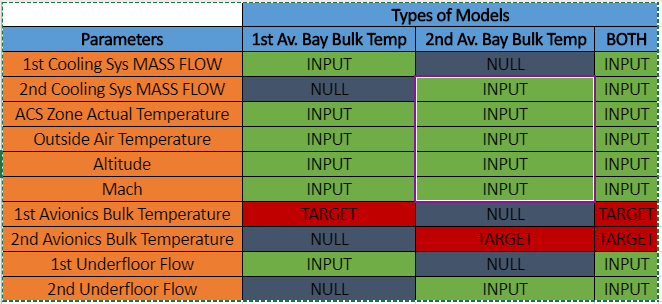

In [2]:
from IPython.display import Image
Image("../DataBombardier/data_input_targets.PNG")

In [3]:
#test of csv to df

In [4]:
csv_stringLoader = "../DataBombardier/flight_test_*.csv"
list_df, list_data_units, list_data_label_type = bomb_csv_to_df(csv_stringLoader)

Loading:../DataBombardier/flight_test_1.csv
Loading:../DataBombardier/flight_test_2.csv
Loading:../DataBombardier/flight_test_3.csv
Loading:../DataBombardier/flight_test_4.csv
Loading:../DataBombardier/flight_test_5.csv
Loading:../DataBombardier/flight_test_6.csv
Loading:../DataBombardier/flight_test_7.csv
Loading:../DataBombardier/flight_test_8.csv
Loading:../DataBombardier/flight_test_9.csv
Loading:../DataBombardier/flight_test_10.csv
Loading:../DataBombardier/flight_test_11.csv
Loading:../DataBombardier/flight_test_12.csv
Loading:../DataBombardier/flight_test_13.csv


In [5]:
list_df[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9260 entries, 0 to 9259
Data columns (total 11 columns):
TIME OF DAY IN SECONDS         9260 non-null object
1st Cooling Sys MASS FLOW      9260 non-null object
2nd Cooling Sys MASS FLOW      9260 non-null object
ACS_Zone_Actual_Temperature    9260 non-null object
Outside Air Temperature_OAT    9260 non-null object
Pressure Altitude              9260 non-null object
Mach                           9260 non-null object
1st AVIONICS BAY BULK TEMP     9260 non-null object
2nd AVIONICS BAY BULK TEMP     9260 non-null object
1st Underfloor flow            9260 non-null object
2nd Underfloor flow            9260 non-null object
dtypes: object(11)
memory usage: 795.9+ KB


In [6]:
list_df[0].head()

,TIME OF DAY IN SECONDS,1st Cooling Sys MASS FLOW,2nd Cooling Sys MASS FLOW,ACS_Zone_Actual_Temperature,Outside Air Temperature_OAT,Pressure Altitude,Mach,1st AVIONICS BAY BULK TEMP,2nd AVIONICS BAY BULK TEMP,1st Underfloor flow,2nd Underfloor flow
0,17902,5.119134,17.831211,29.709884,26.150728,2365.0,0.008851,35.240755,33.76746076717663,8.652254,15.141995
1,17904,5.129402,17.793621,29.709884,26.17243,2364.0,0.008205,35.250933,33.78781427556584,8.712825,15.125606
2,17906,5.144212,17.751606,29.623075,26.194133,2365.0,0.008917,35.233968,33.77085186112588,8.806761,15.103295
3,17908,5.146977,17.708962,29.623075,26.194133,2364.0,0.009194,35.244148,33.78781427556584,8.886403,15.09978
4,17910,5.144015,17.684005,29.623075,26.183282,2364.0,0.005896,35.227183,33.79120814739258,8.932443,15.097211


In [7]:
list_df[0].tail()

,TIME OF DAY IN SECONDS,1st Cooling Sys MASS FLOW,2nd Cooling Sys MASS FLOW,ACS_Zone_Actual_Temperature,Outside Air Temperature_OAT,Pressure Altitude,Mach,1st AVIONICS BAY BULK TEMP,2nd AVIONICS BAY BULK TEMP,1st Underfloor flow,2nd Underfloor flow
9255,36412,5.595042,11.954343,23.372851,23.882852,1722.0,0.009669,23.765409,24.285066219590515,9.544755,16.576988
9256,36414,5.584774,11.967294,23.372851,23.850299,1721.0,0.006147,23.79934,24.264711322262556,9.545623,16.560837
9257,36416,5.572925,11.968559,23.372851,23.850299,1723.0,0.011186,23.79934,24.254533179129204,9.541279,16.553018
9258,36418,5.561867,11.968874,23.372851,23.839447,1723.0,0.00955,23.785768,24.24435503599585,9.537369,16.551794
9259,36420,5.551401,11.978351,23.372851,23.828596,1722.0,0.007862,23.78916,24.26810380515055,9.535671,16.556848


In [8]:
#test of exogenous (not forecasting)

In [12]:
target_choice = 1

list_df_features, list_df_targets = list_df_to_exogeneous_df(list_df, target_choice)

In [13]:
list_df_features[0].head()

,TIME OF DAY IN SECONDS,1st Cooling Sys MASS FLOW,ACS_Zone_Actual_Temperature,Outside Air Temperature_OAT,Pressure Altitude,Mach,1st Underfloor flow
0,17902,5.119134,29.709884,26.150728,2365.0,0.008851,8.652254
1,17904,5.129402,29.709884,26.17243,2364.0,0.008205,8.712825
2,17906,5.144212,29.623075,26.194133,2365.0,0.008917,8.806761
3,17908,5.146977,29.623075,26.194133,2364.0,0.009194,8.886403
4,17910,5.144015,29.623075,26.183282,2364.0,0.005896,8.932443


In [14]:
list_df_targets[0].head()

,1st AVIONICS BAY BULK TEMP
0,35.240755
1,35.250933
2,35.233968
3,35.244148
4,35.227183


In [15]:
#test of endogeneous (forecasting)

In [16]:
target_choice = 0

list_df_features, list_df_targets = list_df_forecasting_endo_df(list_df, target_choice, shift_delta=1)

In [17]:
list_df_features[0].tail()

,TIME OF DAY IN SECONDS,1st AVIONICS BAY BULK TEMP,2nd AVIONICS BAY BULK TEMP
9254,36410,23.775589,24.264711322262556
9255,36412,23.765409,24.285066219590515
9256,36414,23.79934,24.264711322262556
9257,36416,23.79934,24.254533179129204
9258,36418,23.785768,24.24435503599585


In [18]:
list_df_targets[0].tail()

,1st AVIONICS BAY BULK TEMP,2nd AVIONICS BAY BULK TEMP
9254,23.765409,24.285066219590515
9255,23.79934,24.264711322262556
9256,23.79934,24.254533179129204
9257,23.785768,24.24435503599585
9258,23.78916,24.26810380515055


In [19]:
#Testing List splitting for train valid test splitting on the flight axis

In [20]:
liste = [0,1,2,3,4,5,6]
ratio = 0.8
list_part_a, list_part_b = split_list_on_ratio(liste, ratio)

In [21]:
#Testing df rows to vector

In [22]:
df = list_df[0]
vectors = df_rows_to_vectors(df)
vectors[0]

array(['17902', '5.119134', '17.831211', '29.709884', '26.150728',
       '2365.0', '0.008851', '35.240755', '33.76746076717663', '8.652254',
       '15.141995'], dtype=object)

In [23]:
#Testing list of df rows to vector

In [24]:
all_vectors = list_df_rows_to_vectors(list_df)

In [25]:
all_vectors[0]

array(['17902', '5.119134', '17.831211', '29.709884', '26.150728',
       '2365.0', '0.008851', '35.240755', '33.76746076717663', '8.652254',
       '15.141995'], dtype=object)

In [26]:
all_vectors

[array(['17902', '5.119134', '17.831211', '29.709884', '26.150728',
        '2365.0', '0.008851', '35.240755', '33.76746076717663', '8.652254',
        '15.141995'], dtype=object),
 array(['17904', '5.129402', '17.793621', '29.709884', '26.17243',
        '2364.0', '0.008205', '35.250933', '33.78781427556584', '8.712825',
        '15.125606'], dtype=object),
 array(['17906', '5.144212', '17.751606', '29.623075', '26.194133',
        '2365.0', '0.008917', '35.233968', '33.77085186112588', '8.806761',
        '15.103295'], dtype=object),
 array(['17908', '5.146977', '17.708962', '29.623075', '26.194133',
        '2364.0', '0.009194', '35.244148', '33.78781427556584', '8.886403',
        '15.09978'], dtype=object),
 array(['17910', '5.144015', '17.684005', '29.623075', '26.183282',
        '2364.0', '0.005896', '35.227183', '33.79120814739258', '8.932443',
        '15.097211'], dtype=object),
 array(['17912', '5.143818', '17.684954', '29.536267', '26.183282',
        '2364.0', '0.005896',